Data

In [195]:
import pandas as pd
import numpy

df  = pd.read_csv("D:\\00Research\\00Fog\\008Arman\\mcr-rt\\dataset-mcr-rt-180000.csv")
dataset = df.values
print('Total rows:', df.shape[0]) #940520
X = dataset[:, 6] # rt column
print(numpy.min(X)," ",numpy.max(X))
Y = dataset[:, 5] # mcr column
print(numpy.min(Y)," ",numpy.max(Y))

Total rows: 179999
0.01   20662.0
0.0253444780071999   4874.2


In [196]:
from scipy.stats import pearsonr

corr, _ = pearsonr(X, Y)
print('Pearsons correlation: %.3f' % corr)
print()

Pearsons correlation: 0.684



Scatter

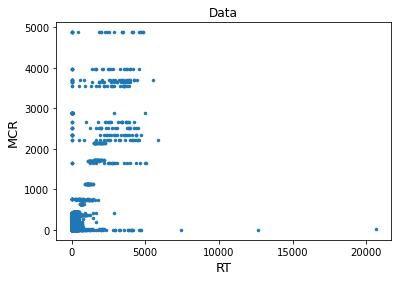

In [197]:
import matplotlib.pyplot as plt
plt.scatter(x=X, y=Y, marker=".", linewidth=0.5)
plt.title('Data')
plt.ylabel('MCR', fontsize=13)
plt.xlabel('RT', fontsize=13)
plt.show()

Reshape

In [198]:
from sklearn.model_selection import train_test_split
X = X.reshape(-1, 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

Linear Regression + Predict + Plot

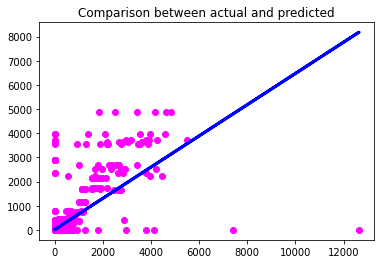

In [199]:
from sklearn import linear_model
reg = linear_model.ARDRegression()
reg.fit(X_train, Y_train)

# prediction
y_predict = reg.predict(X_test)

plt.scatter(x=X_test, y=Y_test, color="magenta")
plt.plot(X_test, y_predict, color="blue", linewidth=3)  
plt.title('Comparison between actual and predicted')
plt.ylabel('', fontsize=18)
plt.xlabel('', fontsize=18)
#plt.legend('Prediction')
plt.show()

In [200]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, r2_score

print("Score is: ",numpy.round(reg.score(X_test, Y_test),4))
print("Accuracy is: ",numpy.round(mean_absolute_error(Y_test[:],y_predict[:]),4)) #/numpy.mean(X_test)

Score is:  0.5237
Accuracy is:  16.1987


ML Pipeline

In [201]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

pipeline0 = Pipeline(steps=[('Polynomial', PolynomialFeatures(degree=3, include_bias=True)),('StandardScalar',StandardScaler()),('Reg', linear_model.ARDRegression(compute_score=True, n_iter=100000000))]).fit(X_train, Y_train)
print()

In [202]:
#Prediction
pipeline0_predict = pipeline0.predict(X_test)

print("Score is: ", numpy.round(pipeline0.score(X_test,Y_test),4))
print("Accuracy is: ",numpy.round(mean_absolute_error(Y_test,pipeline0_predict),4)) #/numpy.mean(X_test)
print('Coefficient of determination: %.2f' % r2_score(Y_test,pipeline0_predict))

from joblib import dump, load, numpy_pickle
import os

dump(pipeline0, os.path.join("D:\\00Research\\00Fog\\008Arman\\mcr-rt\\", "ARDRegression.joblib"))

Score is:  0.6491
Accuracy is:  10.2653
Coefficient of determination: 0.65


['D:\\00Research\\00Fog\\008Arman\\mcr-rt\\ARDRegression.joblib']

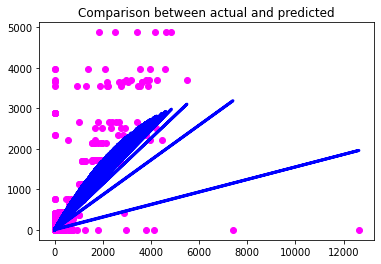

In [203]:
plt.scatter(x=X_test, y=Y_test, color="magenta")
plt.plot(X_test, pipeline0_predict, color="blue", linewidth=3)
plt.title('Comparison between actual and predicted')
plt.ylabel('', fontsize=18)
plt.xlabel('', fontsize=18)
plt.show()

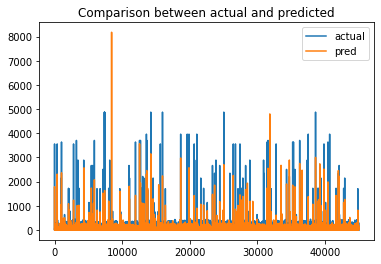

In [204]:
plt.plot(Y_test, label='actual')  # actual plot
plt.plot(y_predict, label='pred')  # predicted plot
plt.title('Comparison between actual and predicted')
plt.ylabel('', fontsize=18)
plt.xlabel('', fontsize=18)
plt.legend()
plt.show()